In [1]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

IMAGE_SHAPE = (299, 299)
NUM_CLASSES = 4
model_path = './Models/saved_engagement_model_6.h5'
test_path = './MidFrameDataSet/Test/'

In [2]:
def test_load(path):
    print("Starting...")
    x, y = [], []
    for file in os.listdir(path):
        if file[0] == '.':
            continue
        im = cv2.imread(path + file)
        im = cv2.resize(im, IMAGE_SHAPE)
        im = tf.keras.utils.normalize(im)
        x.append(im)
    print("Done.")
    return np.array(x)

x_test = test_load(test_path)

Starting...
Done.


In [3]:
classifier_url = 'https://tfhub.dev/google/imagenet/inception_v3/classification/4'
do_fine_tuning = True
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SHAPE + (3,)),
    hub.KerasLayer(classifier_url, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(NUM_CLASSES,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
# model.layers[0].trainable = False # <-- keep commented
model.build((None,)+IMAGE_SHAPE+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              23853833  
_________________________________________________________________
dropout (Dropout)            (None, 1001)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 4008      
Total params: 23,857,841
Trainable params: 23,823,409
Non-trainable params: 34,432
_________________________________________________________________


In [4]:
keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

In [24]:
def test_load_reg(path):
    print("Starting...")
    x, y = [], []
    for file in os.listdir(path):
        if file[0] == '.':
            continue
        im = cv2.imread(path + file)
        im = cv2.resize(im, IMAGE_SHAPE)
#         im = tf.keras.utils.normalize(im)
        x.append(im)
    print("Done.")
    return np.array(x)

x_test_images = test_load_reg(test_path)

Starting...
Done.


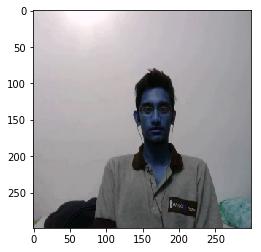

In [44]:
test_idx = 0 # 1000 (boredom), 300 (confusion), 
plt.imshow(x_test_images[test_idx])

In [52]:
tst = np.array([x_test[test_idx]])

def predict(tst):
    res = model.predict(tst)[0]
    mini = np.min(res)
    if mini <= 0:
        res += np.abs(mini)
    res = tf.keras.utils.normalize(res)[0] * 100
    return {'boredom': res[0], 'engagement': res[1], 'confusion': res[2], 'frustration': res[3]}

predict(tst)

{'boredom': 61.3506,
 'engagement': 25.649088,
 'confusion': 74.68754,
 'frustration': 0.0}